In [1]:
import numpy as np
import pandas as pd
import demoji
import nltk
import requests
import matplotlib.pyplot as plt
import re
import tensorflow as tf

from nltk.corpus import stopwords
from collections import Counter
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline
pd.set_option('display.max_colwidth',100)

In [2]:
# SCRAPPING DATA

from bs4 import BeautifulSoup

nama = []
tanggal = []
ulasan = []
for page in range(1,155):
    
    if page == 155:
        url = "https://www.tripadvisor.com/Attraction_Review-g469404-d3780963-Reviews-Double_Six_Beach-Seminyak_Kuta_District_Bali.html"
    else:
        url = "https://www.tripadvisor.com/Attraction_Review-g469404-d3780963-Reviews-or"+str(page*10)+"-Double_Six_Beach-Seminyak_Kuta_District_Bali.html"
        
        page = requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        
        x = soup.find_all('div',class_='_2nBYkPk3')
        for n in  x:
            a = n.find('a',class_='_7c6GgQ6n _22upaSQN _37QDe3gr WullykOU _3WoyIIcL').get_text()
            nama.append(a)
        
        for t in soup.find_all('div', class_='_3JxPDYSx'):
            b = t.get_text()
            tanggal.append(b)
        
        for u in soup.find_all('div',class_='cPQsENeY u7nvAeyZ'):
            c = u.get_text()
            ulasan.append(c) 
            
        df = pd.DataFrame({
            'nama':pd.Series(nama),
            'tanggal':pd.Series(tanggal),
            'ulasan':pd.Series(ulasan)})
        print(df)

            nama             tanggal  \
0       Andrew J  Mar 2020 • Couples   
1       Stefan O            Mar 2020   
2     590biscuit            Mar 2020   
3  leanneandtony            Mar 2020   
4            Kev            Aug 2019   
5        Lilly H            Feb 2020   
6       Adrian B            Feb 2020   
7    Off their P  Feb 2020 • Couples   
8     Kristian B   Feb 2020 • Family   
9        Peter R            Dec 2019   

                                                                                                ulasan  
0  10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1  Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2  Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3  Wide sandy beach which has a surf patrol.The beach is cleaned on a daily basis. Sun lounges and ...  
4  Very nice beach to take a strol

                      nama             tanggal  \
0                 Andrew J  Mar 2020 • Couples   
1                 Stefan O            Mar 2020   
2               590biscuit            Mar 2020   
3            leanneandtony            Mar 2020   
4                      Kev            Aug 2019   
5                  Lilly H            Feb 2020   
6                 Adrian B            Feb 2020   
7              Off their P  Feb 2020 • Couples   
8               Kristian B   Feb 2020 • Family   
9                  Peter R            Dec 2019   
10                  Sogwan            Jan 2020   
11          vanessasmith75  Dec 2019 • Friends   
12     2TravellingGeordies  Dec 2019 • Couples   
13                 Chris S            Dec 2019   
14            kimseouhyoon   Dec 2019 • Family   
15             stephenpysc            Oct 2019   
16            Dumbamakeche  Dec 2019 • Couples   
17             Cameliapark  Aug 2019 • Couples   
18                smithtan  Dec 2019 • Couples   


                      nama             tanggal  \
0                 Andrew J  Mar 2020 • Couples   
1                 Stefan O            Mar 2020   
2               590biscuit            Mar 2020   
3            leanneandtony            Mar 2020   
4                      Kev            Aug 2019   
5                  Lilly H            Feb 2020   
6                 Adrian B            Feb 2020   
7              Off their P  Feb 2020 • Couples   
8               Kristian B   Feb 2020 • Family   
9                  Peter R            Dec 2019   
10                  Sogwan            Jan 2020   
11          vanessasmith75  Dec 2019 • Friends   
12     2TravellingGeordies  Dec 2019 • Couples   
13                 Chris S            Dec 2019   
14            kimseouhyoon   Dec 2019 • Family   
15             stephenpysc            Oct 2019   
16            Dumbamakeche  Dec 2019 • Couples   
17             Cameliapark  Aug 2019 • Couples   
18                smithtan  Dec 2019 • Couples   


             nama             tanggal  \
0        Andrew J  Mar 2020 • Couples   
1        Stefan O            Mar 2020   
2      590biscuit            Mar 2020   
3   leanneandtony            Mar 2020   
4             Kev            Aug 2019   
..            ...                 ...   
65    Peppermaisy  Jul 2019 • Friends   
66            S p   Jul 2019 • Family   
67      blackeldo     Jun 2019 • Solo   
68         Domlea   Jul 2019 • Family   
69        Peter A  Jul 2019 • Friends   

                                                                                                 ulasan  
0   10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1   Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2   Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3   Wide sandy beach which has a surf patrol.The beach is cleaned on a daily basis.

                    nama             tanggal  \
0               Andrew J  Mar 2020 • Couples   
1               Stefan O            Mar 2020   
2             590biscuit            Mar 2020   
3          leanneandtony            Mar 2020   
4                    Kev            Aug 2019   
..                   ...                 ...   
115  Eduardo De La Calle  Apr 2019 • Friends   
116        buddyrogers32   Apr 2019 • Family   
117            Alvilde P     Apr 2019 • Solo   
118                topps  Mar 2019 • Couples   
119  TaherAlbaghliJulian     Mar 2019 • Solo   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to.

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
165      Jayelle62            Nov 2018   
166    adarshjalan  Oct 2018 • Friends   
167     Gill Smith     Jul 2018 • Solo   
168         Ross H            Aug 2018   
169        Grace M  Oct 2018 • Couples   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

                nama             tanggal  \
0           Andrew J  Mar 2020 • Couples   
1           Stefan O            Mar 2020   
2         590biscuit            Mar 2020   
3      leanneandtony            Mar 2020   
4                Kev            Aug 2019   
..               ...                 ...   
215  virtueleighanne   Jul 2018 • Family   
216             Sk M  May 2018 • Couples   
217       harris0nes  Jul 2018 • Couples   
218           Dianne  Jul 2018 • Friends   
219        josephine   Jul 2018 • Family   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patr

                   nama             tanggal  \
0              Andrew J  Mar 2020 • Couples   
1              Stefan O            Mar 2020   
2            590biscuit            Mar 2020   
3         leanneandtony            Mar 2020   
4                   Kev            Aug 2019   
..                  ...                 ...   
265            Sandie H     Mar 2018 • Solo   
266  The Walking Critic   Apr 2018 • Family   
267              cirque  Feb 2018 • Friends   
268             Rasha Y  Apr 2018 • Couples   
269          TheLaskers  Apr 2018 • Couples   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wi

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
315      Dimas A K            Dec 2017   
316        Linda W  Dec 2017 • Couples   
317     Gautham_hr            Jan 2018   
318       Imoy1979  Jan 2018 • Friends   
319      rrrebekah            Aug 2017   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
..              ...                 ...   
365         Jerry J  Oct 2017 • Couples   
366  Natal Surbakti  May 2017 • Friends   
367    brittain2003  Oct 2017 • Couples   
368        evert0n1  Nov 2017 • Couples   
369           Deb F  Nov 2017 • Friends   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
..              ...                 ...   
415           Auz55   Aug 2017 • Family   
416       SanghasUK   Aug 2017 • Family   
417  IndiaTravels97  Sep 2017 • Friends   
418       swnj_1701   Aug 2017 • Family   
419          Josh B  Jun 2017 • Couples   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
465        james c  Mar 2017 • Couples   
466         robj69   Jul 2017 • Family   
467       PhixyBoy  Jul 2017 • Couples   
468          Ali K  Jul 2017 • Couples   
469       Monica F   Jul 2017 • Family   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
515          KDPop  Apr 2017 • Couples   
516       Michelle   Apr 2017 • Family   
517   Michael_Teoh   Mar 2017 • Family   
518         KATY P   Feb 2017 • Family   
519      rosemoo12  Apr 2017 • Couples   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
565      rowanc932  Feb 2017 • Couples   
566        buaya40  Feb 2017 • Couples   
567       BundyRed  Feb 2017 • Couples   
568    Off their P  Feb 2017 • Couples   
569           Geet  Feb 2017 • Couples   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
615      YChan2016   Dec 2016 • Family   
616       Royal80E   Dec 2016 • Family   
617        Timothy     Dec 2016 • Solo   
618     KrisNYC006  Dec 2016 • Couples   
619     lynette291   Dec 2016 • Family   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

                     nama             tanggal  \
0                Andrew J  Mar 2020 • Couples   
1                Stefan O            Mar 2020   
2              590biscuit            Mar 2020   
3           leanneandtony            Mar 2020   
4                     Kev            Aug 2019   
..                    ...                 ...   
665      Truthful Reviews  Oct 2016 • Friends   
666  LisaDolphingirlbyron  Oct 2016 • Friends   
667            tazman1099  Nov 2016 • Couples   
668             emu255103            Oct 2016   
669              Andrew F  Nov 2016 • Friends   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beac

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
715      Picadores     Sep 2016 • Solo   
716   Harrietzhong  Dec 2015 • Friends   
717         Marc P  Sep 2016 • Friends   
718      Helen2515   Sep 2016 • Family   
719         yialli  Sep 2016 • Couples   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
..              ...                 ...   
765      Jodi lee T  Aug 2016 • Couples   
766           PeteW  Aug 2016 • Couples   
767         KayeGie   Jun 2016 • Family   
768        barryjap  Aug 2016 • Couples   
769  rayholiday2016  Aug 2016 • Couples   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach

                 nama             tanggal  \
0            Andrew J  Mar 2020 • Couples   
1            Stefan O            Mar 2020   
2          590biscuit            Mar 2020   
3       leanneandtony            Mar 2020   
4                 Kev            Aug 2019   
..                ...                 ...   
815        MariaWells   Apr 2016 • Family   
816          helenmcd  Jul 2016 • Couples   
817  Tonymaddogsurfer     Jun 2016 • Solo   
818           Chris B  Jul 2016 • Couples   
819           eakalev  Jul 2016 • Couples   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
865        Lydia R            Jun 2016   
866  BrightSide101            Jun 2016   
867        Janet L   Jun 2016 • Family   
868      Ausie1944  Jun 2016 • Couples   
869        Neatesy  Jun 2016 • Friends   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
..              ...                 ...   
915        Rachel A  Apr 2016 • Couples   
916  Salahaldeen  Z  Apr 2016 • Couples   
917        Kerrie W     Apr 2016 • Solo   
918       charles k     Apr 2016 • Solo   
919       Richard C   Apr 2016 • Family   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach

              nama             tanggal  \
0         Andrew J  Mar 2020 • Couples   
1         Stefan O            Mar 2020   
2       590biscuit            Mar 2020   
3    leanneandtony            Mar 2020   
4              Kev            Aug 2019   
..             ...                 ...   
965        Satya R            Mar 2016   
966    Sunset Lise  Mar 2016 • Friends   
967       ALYSSE16     Mar 2016 • Solo   
968        bbrteam   Mar 2016 • Family   
969        Søren H   Mar 2016 • Family   

                                                                                                  ulasan  
0    10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1    Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2    Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3    Wide sandy beach which has a surf patrol.The beach is cleaned 

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
...             ...                 ...   
1015         Kay549     Apr 2015 • Solo   
1016     himeshinra  Jan 2016 • Couples   
1017      Norine007  Jan 2016 • Couples   
1018          新加坡林峰  Jan 2016 • Friends   
1019         ratan3  Feb 2015 • Friends   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach which has a surf patrol.The 

                 nama             tanggal  \
0            Andrew J  Mar 2020 • Couples   
1            Stefan O            Mar 2020   
2          590biscuit            Mar 2020   
3       leanneandtony            Mar 2020   
4                 Kev            Aug 2019   
...               ...                 ...   
1065         Carine P   Jul 2015 • Family   
1066         Birgit K   Nov 2015 • Family   
1067        trishr798   Nov 2015 • Family   
1068  tinesimanjuntak            Nov 2015   
1069       ohclaramia  Oct 2015 • Friends   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach whic

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
...             ...                 ...   
1115     ketutdamar            Jul 2015   
1116       bj582015  Jun 2015 • Friends   
1117        Chris S  Sep 2015 • Friends   
1118      Sunflower   Jul 2015 • Family   
1119        MsGoriH   Aug 2015 • Family   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach which has a surf patrol.The 

                   nama             tanggal  \
0              Andrew J  Mar 2020 • Couples   
1              Stefan O            Mar 2020   
2            590biscuit            Mar 2020   
3         leanneandtony            Mar 2020   
4                   Kev            Aug 2019   
...                 ...                 ...   
1165                Joy  Jul 2015 • Couples   
1166        redbeachsuz  Jul 2015 • Friends   
1167              Ian J            Jul 2015   
1168  IndianinSingaland  Jun 2015 • Couples   
1169         Otis Noble  Jul 2015 • Friends   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3  

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
...             ...                 ...   
1215         Jess K  Jun 2015 • Friends   
1216      Melissa C  Jun 2015 • Couples   
1217       Brooke C   Jun 2015 • Family   
1218       Kristi E  Jun 2015 • Couples   
1219      Rahuli786  Jun 2015 • Couples   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach which has a surf patrol.The 

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
...             ...                 ...   
1265      spankyhan                 NaN   
1266        Megan S                 NaN   
1267        James I                 NaN   
1268     Ramarama33                 NaN   
1269       Nicole D                 NaN   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach which has a surf patrol.The 

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
...             ...                 ...   
1315     LagsFamily                 NaN   
1316           VTik                 NaN   
1317     Lawrence H                 NaN   
1318   Dolphindream                 NaN   
1319   karthickn123                 NaN   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach which has a surf patrol.The 

                nama             tanggal  \
0           Andrew J  Mar 2020 • Couples   
1           Stefan O            Mar 2020   
2         590biscuit            Mar 2020   
3      leanneandtony            Mar 2020   
4                Kev            Aug 2019   
...              ...                 ...   
1365    SamWeinstein                 NaN   
1366       GSewell85                 NaN   
1367            Todd                 NaN   
1368   avidtraveller                 NaN   
1369  RichardConnery                 NaN   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach which has a surf

                  nama             tanggal  \
0             Andrew J  Mar 2020 • Couples   
1             Stefan O            Mar 2020   
2           590biscuit            Mar 2020   
3        leanneandtony            Mar 2020   
4                  Kev            Aug 2019   
...                ...                 ...   
1415        daCoach420                 NaN   
1416         Aussa2012                 NaN   
1417            Omri B                 NaN   
1418  adrian_stevens98                 NaN   
1419        nogenmania                 NaN   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sand

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
...             ...                 ...   
1465   22jenny22_12                 NaN   
1466         Lily A                 NaN   
1467          Ffteo                 NaN   
1468        Janet H                 NaN   
1469        David S                 NaN   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach which has a surf patrol.The 

               nama             tanggal  \
0          Andrew J  Mar 2020 • Couples   
1          Stefan O            Mar 2020   
2        590biscuit            Mar 2020   
3     leanneandtony            Mar 2020   
4               Kev            Aug 2019   
...             ...                 ...   
1515      mlock2000                 NaN   
1516   1NZfamilyof4                 NaN   
1517       FEbulous                 NaN   
1518   AngelinaK656                 NaN   
1519          583RS                 NaN   

                                                                                                   ulasan  
0     10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...  
1     Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...  
2     Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to...  
3     Wide sandy beach which has a surf patrol.The 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nama     1536 non-null   object
 1   tanggal  1520 non-null   object
 2   ulasan   1536 non-null   object
dtypes: object(3)
memory usage: 36.1+ KB


In [4]:
df.to_csv('Data/double_six.csv', index=False, encoding="utf8")

In [3]:
df=pd.read_csv('Data/double_six.csv')
df.iloc[1500:1536]

,nama,tanggal,ulasan
1500,PatBintang,Apr 2013 • Friends,Years ago the beach was quite clean down here but now the sand got more and more grey. The littl...
1501,Katya R,Nov 2012 • Family,"I was hoping my husband can learn to surf there, as I remember it being nicer than Kuta, and qui..."
1502,travelexpert w,Feb 2013 • Friends,"Very nice beach in Bali, there are lots of things to do, surfing, soccer, tanning, sunset. will ..."
1503,Steve Herman,Apr 2013 • Family,Nice surf and sand but can become very crowded and the roaming touts are almost as annoying as o...
1504,Magdala79,Mar 2013 • Family,Quiet beach with many unique beach cafes. Pretty quiet even for the weekend. Beach is clean too....
1505,Eat1Drink2Travel3,Mar 2013 • Couples,Double six is bang in the middle of Kuta and Seminyak and a better beach than either for a numbe...
1506,cindychng77,Mar 2013 • Solo,"Am an amateur surfer, and Double Six beach, although popular, is not too crowded that I cant get..."
1507,Fio ng,Mar 2013 • Solo,I like the fine sand and the long coastline. We took some great pictures there. The beach is not...
1508,whitstar,Mar 2013 • Solo,"Look it's Bali, I know, but when I go to the beach, I like to relax. You just can't here. You ar..."
1509,dekanggit,Jan 2013 • Friends,"My favorite place to do daily sport like jogging, volley beach, sunbathing, learn to surf, etc. ..."


In [4]:
# SPLIT DATA

new = df["tanggal"].str.split(" • ", n=1,expand=True)
df["tgl_ulasan"]=new[0]
df.drop(columns=["tanggal"],inplace=True)

In [5]:
df=df[['nama','tgl_ulasan','ulasan']]
df

,nama,tgl_ulasan,ulasan
0,Andrew J,Mar 2020,10 minute walk from amadea hotel through the back roads lovely beach plenty of sun beds to hire ...
1,Stefan O,Mar 2020,Double Six Beach is a great Beach for all surfers out there to enjoy those Big Waves each and Ev...
2,590biscuit,Mar 2020,"Was disappointed by this beach, dirty, full of cigarette ends etc. Not a sitting beach as sea to..."
3,leanneandtony,Mar 2020,Wide sandy beach which has a surf patrol.The beach is cleaned on a daily basis. Sun lounges and ...
4,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...
...,...,...,...
1531,jessica m,NaN,"I remember that was a nice beach near my hotel when I went to seminyak, Bali. Very nice sunset w..."
1532,Adhy76,NaN,It is a great beach to walk and play around. There are several cafes near the beach to hangout a...
1533,Latitudes-Longitudes,NaN,"I love going for sunset drinks to the bars on this area, the black sand and colorful cushions cr..."
1534,Lina Jasin,NaN,"The best place to hang out and go crazy a bit, get drunk and dance, if you feel hot then go to t..."


In [6]:
df = df[~df['tgl_ulasan'].str.contains("2020|2021",na = False)]
df

,nama,tgl_ulasan,ulasan
4,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...
9,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six..."
11,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...
12,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...
13,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...
...,...,...,...
1531,jessica m,NaN,"I remember that was a nice beach near my hotel when I went to seminyak, Bali. Very nice sunset w..."
1532,Adhy76,NaN,It is a great beach to walk and play around. There are several cafes near the beach to hangout a...
1533,Latitudes-Longitudes,NaN,"I love going for sunset drinks to the bars on this area, the black sand and colorful cushions cr..."
1534,Lina Jasin,NaN,"The best place to hang out and go crazy a bit, get drunk and dance, if you feel hot then go to t..."


In [7]:
df['tgl_ulasan'] = df['tgl_ulasan'].replace(np.nan, '2013', regex=True)
df.iloc[1500:1535]

<ipython-input-7-03ab0403bb13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tgl_ulasan'] = df['tgl_ulasan'].replace(np.nan, '2013', regex=True)


,nama,tgl_ulasan,ulasan
1509,dekanggit,Jan 2013,"My favorite place to do daily sport like jogging, volley beach, sunbathing, learn to surf, etc. ..."
1510,Jayson C,Mar 2013,"Cool Beach, Food's are available. the chairs cost 30000IDR, cant really swim our far as the guar..."
1511,WiestGabi,Feb 2013,"The beach itself is like Kuta, grey sand and grey sea, but the beach clubs are the highlight of ..."
1512,Lorraine P,Nov 2012,Loved the small fee to have the use of a large sunbed and umbrella for the day! In the afternoo...
1513,stephanieosigli,Mar 2013,loved the beach for just a small price of $3 AUD you can rent a banana lounge and be serviced co...
1514,J0insing,Jan 2013,"The Good:It's Bali! The sea is warm, the sun is shining, the surf is fantastic, sunsets are epi..."
1515,mlock2000,Jan 2013,double six was the first beach we went to during our stay in Bali. it was a short taxi ride from...
1516,1NZfamilyof4,Feb 2013,"If you want to be in the heart of the action, see, hear and smell the epic waves of Bali this is..."
1517,FEbulous,Jan 2013,really crowded but I'm enjoy with that. I've seen beautiful sunset from this place. I visited th...
1518,AngelinaK656,Nov 2012,The beach was very nice to spend time with family. After the activity on the beach we can enjoy ...


In [8]:
df.to_csv('double_six.csv', index=False, encoding="utf8")

In [2]:
df=pd.read_csv('double_six.csv')
df

,nama,tgl_ulasan,ulasan
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six..."
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...
4,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...
...,...,...,...
1522,jessica m,2013,"I remember that was a nice beach near my hotel when I went to seminyak, Bali. Very nice sunset w..."
1523,Adhy76,2013,It is a great beach to walk and play around. There are several cafes near the beach to hangout a...
1524,Latitudes-Longitudes,2013,"I love going for sunset drinks to the bars on this area, the black sand and colorful cushions cr..."
1525,Lina Jasin,2013,"The best place to hang out and go crazy a bit, get drunk and dance, if you feel hot then go to t..."


In [3]:
df.columns

Index(['nama', 'tgl_ulasan', 'ulasan'], dtype='object')

In [4]:
# EMOJI REMOVAL

def deEmojify(txt):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return (emoji_pattern.sub(r'', txt))

lst = []

for w in df["ulasan"]:
    lst.append(deEmojify(w))

df["ulasan_emoji"] = pd.DataFrame(lst)
df.iloc[20:30]

,nama,tgl_ulasan,ulasan,ulasan_emoji
20,N2N,Nov 2019,"Wonderful beach to holiday, great place to watch sunset with a drink, food and music, good for f...","Wonderful beach to holiday, great place to watch sunset with a drink, food and music, good for f..."
21,mutiaraputrilestari,Jun 2019,Double Six Beach is one of the never ending happening spot in Bali! What makes it become everyon...,Double Six Beach is one of the never ending happening spot in Bali! What makes it become everyon...
22,mascotty02,Sep 2019,"Were there last year, and really was not impressed with the beach itself, it seemed scraggy and ...","Were there last year, and really was not impressed with the beach itself, it seemed scraggy and ..."
23,Maureen M,Oct 2019,Fine groomed sand and lovely warm waters. Take the locals knowledge on board on deciding best ti...,Fine groomed sand and lovely warm waters. Take the locals knowledge on board on deciding best ti...
24,Jean1823,Oct 2019,"great view of the sunset.. many vendors too, even at the bar they will approach you ;( but not a...","great view of the sunset.. many vendors too, even at the bar they will approach you ;( but not a..."
25,Kate N,Oct 2019,Get down and see Carlos for a beach chair. Gorgeous beach. Lots of fun in the surf. Watch out fo...,Get down and see Carlos for a beach chair. Gorgeous beach. Lots of fun in the surf. Watch out fo...
26,Russ Lacuata,Oct 2019,"Great spot to view the sunset. Clean and not too crowded. Plenty of space to move around, or too...","Great spot to view the sunset. Clean and not too crowded. Plenty of space to move around, or too..."
27,BJM,Oct 2019,Well it is still not as clean as it could be...but much much better than it has been...we all ne...,Well it is still not as clean as it could be...but much much better than it has been...we all ne...
28,Malferg,Sep 2019,"It's a nice, clean and not overcrowded beach. It's quite wide and dotted with umbrella's and lou...","It's a nice, clean and not overcrowded beach. It's quite wide and dotted with umbrella's and lou..."
29,Ellenia R,Oct 2019,I came to this beach for watch the sunset and the view it's really amazing. I can't describe wit...,I came to this beach for watch the sunset and the view it's really amazing. I can't describe wit...


In [5]:
# EMOTICON REMOVAL

from emot.emo_unicode import UNICODE_EMO, EMOTICONS
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

lsst = []

for w in df["ulasan_emoji"]:
    lsst.append(remove_emoticons(w))

df["ulasan_emot"] = pd.DataFrame(lsst)
df.iloc[20:30]

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot
20,N2N,Nov 2019,"Wonderful beach to holiday, great place to watch sunset with a drink, food and music, good for f...","Wonderful beach to holiday, great place to watch sunset with a drink, food and music, good for f...","Wonderful beach to holiday, great place to watch sunset with a drink, food and music, good for f..."
21,mutiaraputrilestari,Jun 2019,Double Six Beach is one of the never ending happening spot in Bali! What makes it become everyon...,Double Six Beach is one of the never ending happening spot in Bali! What makes it become everyon...,Double Six Beach is one of the never ending happening spot in Bali! What makes it become everyon...
22,mascotty02,Sep 2019,"Were there last year, and really was not impressed with the beach itself, it seemed scraggy and ...","Were there last year, and really was not impressed with the beach itself, it seemed scraggy and ...","Were there last year, and really was not impressed with the beach itself, it seemed scraggy and ..."
23,Maureen M,Oct 2019,Fine groomed sand and lovely warm waters. Take the locals knowledge on board on deciding best ti...,Fine groomed sand and lovely warm waters. Take the locals knowledge on board on deciding best ti...,Fine groomed sand and lovely warm waters. Take the locals knowledge on board on deciding best ti...
24,Jean1823,Oct 2019,"great view of the sunset.. many vendors too, even at the bar they will approach you ;( but not a...","great view of the sunset.. many vendors too, even at the bar they will approach you ;( but not a...","great view of the sunset.. many vendors too, even at the bar they will approach you ;( but not a..."
25,Kate N,Oct 2019,Get down and see Carlos for a beach chair. Gorgeous beach. Lots of fun in the surf. Watch out fo...,Get down and see Carlos for a beach chair. Gorgeous beach. Lots of fun in the surf. Watch out fo...,Get down and see Carlos for a beach chair. Gorgeous beach. Lots of fun in the surf. Watch out fo...
26,Russ Lacuata,Oct 2019,"Great spot to view the sunset. Clean and not too crowded. Plenty of space to move around, or too...","Great spot to view the sunset. Clean and not too crowded. Plenty of space to move around, or too...","Great spot to view the sunset. Clean and not too crowded. Plenty of space to move around, or too..."
27,BJM,Oct 2019,Well it is still not as clean as it could be...but much much better than it has been...we all ne...,Well it is still not as clean as it could be...but much much better than it has been...we all ne...,Well it is still not as clean as it could be...but much much better than it has been...we all ne...
28,Malferg,Sep 2019,"It's a nice, clean and not overcrowded beach. It's quite wide and dotted with umbrella's and lou...","It's a nice, clean and not overcrowded beach. It's quite wide and dotted with umbrella's and lou...","It's a nice, clean and not overcrowded beach. It's quite wide and dotted with umbrella's and lou..."
29,Ellenia R,Oct 2019,I came to this beach for watch the sunset and the view it's really amazing. I can't describe wit...,I came to this beach for watch the sunset and the view it's really amazing. I can't describe wit...,I came to this beach for watch the sunset and the view it's really amazing. I can't describe wit...


In [6]:
# CASE FOLDING

df["ulasan_fold"]= df["ulasan_emot"].str.lower()
df.head(10)

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six..."
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...
4,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough. evenings are great as the bars &...
5,kimseouhyoon,Dec 2019,"The location is very close from city , you can enjoy the beach and buy coconut water during wait...","The location is very close from city , you can enjoy the beach and buy coconut water during wait...","The location is very close from city , you can enjoy the beach and buy coconut water during wait...","the location is very close from city , you can enjoy the beach and buy coconut water during wait..."
6,stephenpysc,Oct 2019,This is the section of the beach in Bali that is relaxed and has everything you need from water ...,This is the section of the beach in Bali that is relaxed and has everything you need from water ...,This is the section of the beach in Bali that is relaxed and has everything you need from water ...,this is the section of the beach in bali that is relaxed and has everything you need from water ...
7,Dumbamakeche,Dec 2019,Good beach to spend our time while waiting for the golden hour (sunset) so many restaurant aroun...,Good beach to spend our time while waiting for the golden hour (sunset) so many restaurant aroun...,Good beach to spend our time while waiting for the golden hour (sunset so many restaurant around...,good beach to spend our time while waiting for the golden hour (sunset so many restaurant around...
8,Cameliapark,Aug 2019,"It was my second time in Bali, still beautiful as always and this beach is the most beautiful he...","It was my second time in Bali, still beautiful as always and this beach is the most beautiful he...","It was my second time in Bali, still beautiful as always and this beach is the most beautiful he...","it was my second time in bali, still beautiful as always and this beach is the most beautiful he..."
9,smithtan,Dec 2019,Really recommended. One of the best place to get the magical sunset where many bar surriunding t...

In [7]:
# REMOVE PUNCTUATION

import string
tndbc = str.maketrans(' ', ' ', string.punctuation)

lst1 = []

for w in df["ulasan_fold"]:
    lst1.append(w.translate(tndbc))

df["ulasan_punct"] = pd.DataFrame(lst1)
df.head()

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...
4,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough. evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough evenings are great as the bars r...


In [8]:
# STOPWORD REMOVAL

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["ulasan_stop"] = df["ulasan_punct"].apply(stopwords)
df.head()

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...
4,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough. evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough evenings are great as the bars r...,great surfing swimming sea rough evenings great bars restaurants along beach prepare amazing sun...


In [9]:
# STOPWORD REMOVAL

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["ulasan_stop"] = df["ulasan_punct"].apply(stopwords)
df.head()

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...
4,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough. evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough evenings are great as the bars r...,great surfing swimming sea rough evenings great bars restaurants along beach prepare amazing sun...


In [10]:
# Checking the first 10 most frequent words
from collections import Counter
cnt = Counter()
for text in df["ulasan_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('beach', 2204),
 ('great', 516),
 ('sunset', 502),
 ('good', 385),
 ('nice', 377),
 ('place', 334),
 ('double', 306),
 ('bali', 288),
 ('six', 273),
 ('clean', 258)]

In [11]:
#FREQUENT WORD REMOVAL


FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])

def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["ulasan_freq"] = df["ulasan_stop"].apply(lambda text: remove_freqwords(text))
df.head()

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop,ulasan_freq
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...,take stroll although get hounded people trying sell things dont get left alone long gets annoying
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach,spot hang friends see also amazing beside many options restaurants choose along
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...
4,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough. evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough evenings are great as the bars r...,great surfing swimming sea rough evenings great bars restaurants along beach prepare amazing sun...,surfing swimming sea rough evenings bars restaurants along prepare amazing sunsets lanterns cand...


In [12]:
# RARE WORD REMOVAL

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["ulasan_rare"] = df["ulasan_freq"].apply(lambda text: remove_rarewords(text))
df.head()

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop,ulasan_freq,ulasan_rare
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hounded people trying sell things dont get left alone long gets annoying
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach,spot hang friends see also amazing beside many options restaurants choose along,spot hang friends see also amazing beside many options restaurants choose along
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...
4,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough. evenings are great as the bars &...,great for surfing but not for swimming as the sea is too rough evenings are great as the bars r...,great surfing swimming sea rough evenings great bars restaurants along beach prepare amazing sun...,surfing swimming sea rough evenings bars restaurants 

In [13]:
# STEMMING

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

df["ulasan_stem"]=df["ulasan_rare"].apply(lambda x:' '.join([ps.stem(word) for word in x.split()]))
df.head()

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop,ulasan_freq,ulasan_rare,ulasan_stem
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hound peopl tri sell thing dont get left alon long get annoy
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walk kuta return north seminyak love afternoon barefoot walk
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach,spot hang friends see also amazing beside many options restaurants choose along,spot hang friends see also amazing beside many options restaurants choose along,spot hang friend see also amaz besid mani option restaur choos along
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...,wrote previou review stay seminyak visit beach balifound 6 fill plastic high low water noth way ...
4,Chris S,Dec 2019,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,Great for surfing but not for swimming as the sea is too rough. Evenings are great as the bars &...,gre

In [14]:
# LEMMATIZATION

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["ulasan_lemma"] = df["ulasan_rare"].apply(lemmatize_words)
df.head()

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop,ulasan_freq,ulasan_rare,ulasan_stem,ulasan_lemma
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hound peopl tri sell thing dont get left alon long get annoy,take stroll although get hound people try sell thing dont get left alone long get annoy
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walk kuta return north seminyak love afternoon barefoot walk,surf like sort thing walk kuta return north seminyak lovely afternoon barefoot walk
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach,spot hang friends see also amazing beside many options restaurants choose along,spot hang friends see also amazing beside many options restaurants choose along,spot hang friend see also amaz besid mani option restaur choos along,spot hang friend see also amaze beside many option restaurant choose along
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...,wrote previou review stay seminyak visit beach balifound 6 fill plastic high low water noth way ...,write previous review stay seminyak visit beach balifound 6 fi

In [15]:
# DATA LABELLING

from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

df['scores']=df['ulasan_lemma'].apply(lambda Description:vds.polarity_scores(Description))
df.head()

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop,ulasan_freq,ulasan_rare,ulasan_stem,ulasan_lemma,scores
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hound peopl tri sell thing dont get left alon long get annoy,take stroll although get hound people try sell thing dont get left alone long get annoy,"{'neg': 0.156, 'neu': 0.751, 'pos': 0.093, 'compound': -0.2869}"
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walk kuta return north seminyak love afternoon barefoot walk,surf like sort thing walk kuta return north seminyak lovely afternoon barefoot walk,"{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.743}"
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach,spot hang friends see also amazing beside many options restaurants choose along,spot hang friends see also amazing beside many options restaurants choose along,spot hang friend see also amaz besid mani option restaur choos along,spot hang friend see also amaze beside many option restaurant choose along,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.7717}"
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...,wrote previous review stay seminyak visiting beaches balifound 6

In [16]:
# DATA LABELLING

df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['label']=''
df.loc[df.compound>=0,'label']='POSITIVE'
df.loc[df.compound<0,'label']='NEGATIVE'
df

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop,ulasan_freq,ulasan_rare,ulasan_stem,ulasan_lemma,scores,compound,label
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hound peopl tri sell thing dont get left alon long get annoy,take stroll although get hound people try sell thing dont get left alone long get annoy,"{'neg': 0.156, 'neu': 0.751, 'pos': 0.093, 'compound': -0.2869}",-0.2869,NEGATIVE
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walk kuta return north seminyak love afternoon barefoot walk,surf like sort thing walk kuta return north seminyak lovely afternoon barefoot walk,"{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.743}",0.7430,POSITIVE
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach,spot hang friends see also amazing beside many options restaurants choose along,spot hang friends see also amazing beside many options restaurants choose along,spot hang friend see also amaz besid mani option restaur choos along,spot hang friend see also amaze beside many option restaurant choose along,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.7717}",0.7717,POSITIVE
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...,

In [17]:
df.to_csv('double_six_processed.csv', index=False, encoding="utf8")

In [2]:
df=pd.read_csv('double_six_processed.csv')
df

,nama,tgl_ulasan,ulasan,ulasan_emoji,ulasan_emot,ulasan_fold,ulasan_punct,ulasan_stop,ulasan_freq,ulasan_rare,ulasan_stem,ulasan_lemma,scores,compound,label
0,Kev,Aug 2019,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,Very nice beach to take a stroll. Although you get HOUNDED by people trying to sell you things. ...,very nice beach to take a stroll. although you get hounded by people trying to sell you things. ...,very nice beach to take a stroll although you get hounded by people trying to sell you things yo...,nice beach take stroll although get hounded people trying sell things dont get left alone long g...,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hounded people trying sell things dont get left alone long gets annoying,take stroll although get hound peopl tri sell thing dont get left alon long get annoy,take stroll although get hound people try sell thing dont get left alone long get annoy,"{'neg': 0.156, 'neu': 0.751, 'pos': 0.093, 'compound': -0.2869}",-0.2869,NEGATIVE
1,Peter R,Dec 2019,"Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","Good beach, nice and clean, good surf if you like that sort of thing. I walked from Double Six...","good beach, nice and clean, good surf if you like that sort of thing. i walked from double six...",good beach nice and clean good surf if you like that sort of thing i walked from double six do...,good beach nice clean good surf like sort thing walked double six kuta beach returned north semi...,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walked kuta returned north seminyak lovely afternoon barefoot walk,surf like sort thing walk kuta return north seminyak love afternoon barefoot walk,surf like sort thing walk kuta return north seminyak lovely afternoon barefoot walk,"{'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.743}",0.7430,POSITIVE
2,vanessasmith75,Dec 2019,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,Nice spot to hang out with friends. We can see also sunset which is amazing. Beside that there a...,nice spot to hang out with friends. we can see also sunset which is amazing. beside that there a...,nice spot to hang out with friends we can see also sunset which is amazing beside that there are...,nice spot hang friends see also sunset amazing beside many options restaurants choose along beach,spot hang friends see also amazing beside many options restaurants choose along,spot hang friends see also amazing beside many options restaurants choose along,spot hang friend see also amaz besid mani option restaur choos along,spot hang friend see also amaze beside many option restaurant choose along,"{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.7717}",0.7717,POSITIVE
3,2TravellingGeordies,Dec 2019,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,Wrote a previous review up our stay in Seminyak and visiting the beaches here in Bali.Found Doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in bali.found doub...,wrote a previous review up our stay in seminyak and visiting the beaches here in balifound doubl...,wrote previous review stay seminyak visiting beaches balifound double 6 beach filled plastics hi...,wrote previous review stay seminyak visiting beaches balifound 6 filled plastics high low water ...,

In [3]:
display(df.shape)
display(df.describe())

(1527, 15)

,compound
count,1527.000000
mean,0.485512
std,0.457806
min,-0.962300
25%,0.226300
50%,0.636900
75%,0.850700
max,0.996200


In [4]:
labels = np.array(df['label'])
y = []
for i in range(len(labels)):
    if labels[i] == 'NEGATIVE':
        y.append(0)
    if labels[i] == 'POSITIVE':
        y.append(1)
df['label'] = np.array(y)
labels = tf.keras.utils.to_categorical(y, 2, dtype="float32")

In [5]:
df_processed = pd.DataFrame()
df_processed["ulasan"] = df["ulasan_lemma"]
df_processed["label"] = df["label"]

df_processed

,ulasan,label
0,take stroll although get hound people try sell thing dont get left alone long get annoy,0
1,surf like sort thing walk kuta return north seminyak lovely afternoon barefoot walk,1
2,spot hang friend see also amaze beside many option restaurant choose along,1
3,write previous review stay seminyak visit beach balifound 6 filled plastic high low water nothin...,0
4,surf swim sea rough evening bar restaurant along prepare amaze sunset lanterns candle comfy bean...,1
...,...,...
1522,remember near hotel go seminyak enjoy bar around enjoy,1
1523,walk play around several cafe near hangout see,1
1524,love go drink bar area black sand colorful cushion create much trash float ashore current come v...,1
1525,best hang go crazy bit get drunk dance feel hot go go friends love one fun release much work,1


In [6]:
Counter(df['label'])

Counter({0: 193, 1: 1334})

<AxesSubplot:title={'center':'sentiment analysis'}>

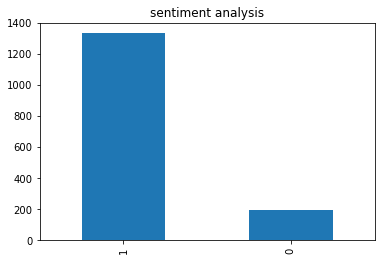

In [7]:
df.label.value_counts().plot(kind='bar',title="sentiment analysis")

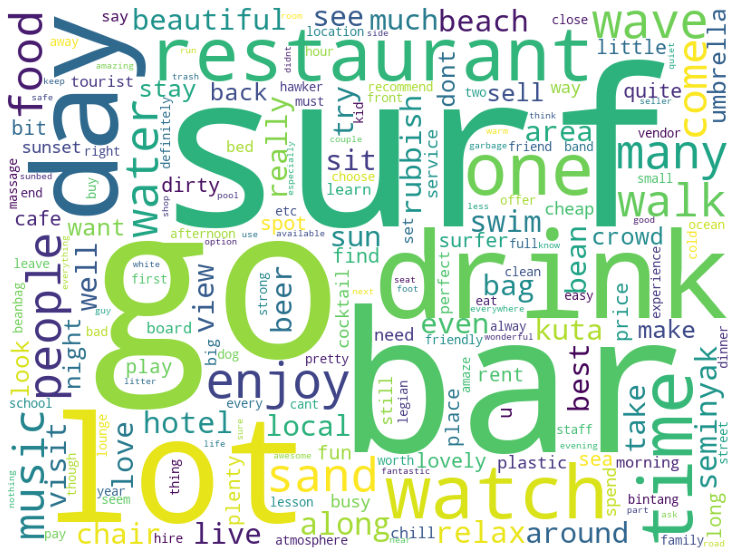

In [8]:
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height, collocations=False).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(df_processed['ulasan']))

In [9]:
df['ulasan_lemma'].values.astype('U')

array(['take stroll although get hound people try sell thing dont get left alone long get annoy',
       'surf like sort thing walk kuta return north seminyak lovely afternoon barefoot walk',
       'spot hang friend see also amaze beside many option restaurant choose along',
       ...,
       'love go drink bar area black sand colorful cushion create much trash float ashore current come view experience romantic go drink rest year',
       'best hang go crazy bit get drunk dance feel hot go go friends love one fun release much work',
       'go late afternoon beer lot hawker learn ignore family kid play pleasant walk back seminyak'],
      dtype='<U2080')

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(stop_words='english')
resp = vec.fit_transform(df['ulasan_lemma'])
print(resp)
# print(train_data['review'])

  (0, 320)	0.34450175786851006
  (0, 2561)	0.26130169353977073
  (0, 2481)	0.4565653742583632
  (0, 1417)	0.24765227622827293
  (0, 4282)	0.2712946573197654
  (0, 3675)	0.238108566437955
  (0, 4441)	0.23298367302044617
  (0, 3077)	0.1974608686278956
  (0, 2147)	0.4565653742583632
  (0, 4025)	0.3335202615727906
  (1, 516)	0.422479110523611
  (1, 235)	0.25674718586889866
  (1, 2588)	0.22667991102068794
  (1, 3682)	0.20121041395110453
  (1, 2869)	0.334465283952306
  (1, 3502)	0.3187819410846234
  (1, 2415)	0.20887727455673052
  (1, 4631)	0.3733679881013143
  (1, 3890)	0.37315148938296294
  (1, 2514)	0.20242298117415333
  (1, 4138)	0.1547972875599207
  (1, 4282)	0.25104033721445274
  (2, 974)	0.3857256674173721
  (2, 3476)	0.24640864005835209
  (2, 2955)	0.418105947553366
  :	:
  (1525, 1475)	0.36141509333296995
  (1525, 1236)	0.31373456841701786
  (1525, 1183)	0.3322946694414842
  (1525, 3428)	0.34980349311901904
  (1525, 2135)	0.2660540435010657
  (1525, 4779)	0.28033476511501654
  (1525

In [14]:
doublesix_train, doublesix_test = train_test_split(df,test_size=0.2, random_state=0)

In [15]:
doublesix_train.to_csv('02double_six_train.csv', index=False, encoding='utf-8')
doublesix_test.to_csv('02double_six_test.csv', index=False, encoding='utf-8')

In [2]:
train_data= pd.read_csv('03data_train.csv')
train_data.dropna(axis = 0, how ='any',inplace=True) 

train_data['Num_words_text'] = train_data['ulasan_lemma'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('-------Train data--------')
print(train_data['label'].value_counts())
print(len(train_data))
max_train_sentence_length  = train_data['Num_words_text'].max()


test_data= pd.read_csv('03double_six_test.csv')
test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data['Num_words_text'] = test_data['ulasan_lemma'].apply(lambda x:len(str(x).split())) 

max_test_sentence_length  = test_data['Num_words_text'].max()

mask = test_data['Num_words_text'] >2
test_data = test_data[mask]

print('-------Test data--------')
print(test_data['label'].value_counts())
print(len(test_data))
print('-------------------------')

print('Train Max Sentence Length :'+str(max_train_sentence_length))
print('Test Max Sentence Length :'+str(max_test_sentence_length))

#all_sentences = train_data['text'].tolist() + test_data['text'].tolist()

-------Train data--------
1    6506
0     988
Name: label, dtype: int64
7494
-------Test data--------
1    407
0     52
Name: label, dtype: int64
459
-------------------------
Train Max Sentence Length :383
Test Max Sentence Length :332


In [3]:
max_len = 142

# prepare tokenizer 
tokenizer = Tokenizer() 
tokenizer.fit_on_texts(train_data['ulasan_lemma'])

# integer encode the documents
sequences = tokenizer.texts_to_sequences(train_data['ulasan_lemma'])
X_test  = tokenizer.texts_to_sequences(test_data['ulasan_lemma'])

# pad documents to a max length 
X = pad_sequences(sequences, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [4]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

max_words = len(word_index)+1
print(max_words)

Found 13154 unique tokens.
13155


In [5]:
print(X.shape)
print(X_test.shape)

(7494, 142)
(459, 142)


In [6]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
# over = SMOTE(
#     sampling_strategy=0.8
# )
under = RandomUnderSampler(
#     sampling_strategy=0.8
)
steps = [
#     ('o', over), 
    ('u', under)
        ]
pipeline = Pipeline(steps=steps)


# transform the dataset
X, y = pipeline.fit_resample(X, train_data['label'])

In [7]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 988, 1: 988})


In [8]:
# One-hot encoding of labels
from keras.utils.np_utils import to_categorical

y_test = tf.keras.utils.to_categorical(test_data['label'])
y = tf.keras.utils.to_categorical(y)

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      test_size=0.2,
                                                      random_state=0)

In [10]:
print('-----TRAIN SHAPE---')
print('x_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('')
print('-----VALID SHAPE---')
print('x_valid: ',X_valid.shape)
print('y_valid: ',y_valid.shape)
print('')
print('-----TEST SHAPE---')
print('x_test: ',X_test.shape)
print('y_test: ',y_test.shape)

-----TRAIN SHAPE---
x_train:  (1580, 142)
y_train:  (1580, 2)

-----VALID SHAPE---
x_valid:  (396, 142)
y_valid:  (396, 2)

-----TEST SHAPE---
x_test:  (459, 142)
y_test:  (459, 2)


In [11]:
tf.keras.backend.clear_session()

In [12]:
## RECURRENT NEURAL NETWORK

import keras
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import Embedding, SimpleRNN, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.constraints import maxnorm
import time

model = Sequential()
model.add(Embedding(max_words,
                    32,
                    input_length =max_len
                   ))
# model.add(Dropout(0.3))
model.add(SimpleRNN(16,
                    input_shape = (max_words,max_len), 
#                     return_sequences=True,
                    kernel_constraint=maxnorm(3),
                    activation="relu",
                   ))
model.add(Dropout(0.3))
# model.add(SimpleRNN(16,
#                     kernel_constraint=maxnorm(3),
# #                     return_sequences=True,
#                     activation="relu"
#                    ))
# model.add(Dropout(0.3))
# model.add(SimpleRNN(16,
#                     kernel_constraint=maxnorm(3),
#                     activation="relu"
#                    ))
# model.add(Dropout(0.3))
model.add(Dense(2,activation='sigmoid'))
print(model.summary())

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Implementing model checkpoins to save the best metric and do not lose it on training.
callback = EarlyStopping(monitor='val_loss',
                         patience=0.001,
                         mode='auto',
                         verbose=True,
                         restore_best_weights=True
                        )

checkpoint = ModelCheckpoint("Model/03double_six_sentiment_analysis.hdf5", 
                             monitor='val_accuracy', 
                             verbose=True,
                             save_best_only=True, 
                             mode='auto',
                             save_weights_only=True)

start = time.time()

# Fit the model to the training set
history = model.fit(X_train, 
                    y_train, 
                    epochs=70, 
                    batch_size=64,
                    validation_data=(X_valid,y_valid), 
                    callbacks=[checkpoint,callback]
                   )

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


end = time.time()
total = (end-start)/60
print('Training duration(minutes): {}'.format(total))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 142, 32)           420960    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 34        
Total params: 421,778
Trainable params: 421,778
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/70
25/25 [==============================] - 30s 75ms/step - loss: 0.6912 - accuracy: 0.5466 - val_loss: 0.6910 - val_accuracy: 0.5101

Epoch 00001: val_accuracy improved from -inf to 0.51010, saving model to Model\03double_six_sentimen

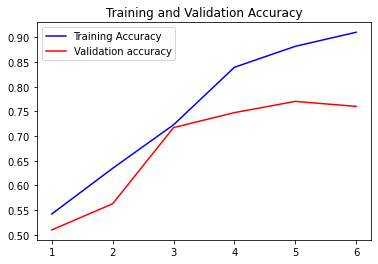

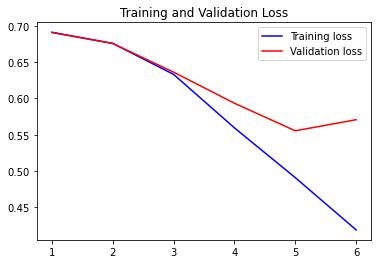

In [13]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [14]:
model.save('Model/03double_six_sentiment_analysis.hdf5')

In [15]:
import pickle

def preprocess_texts(text):

    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(X)
    sequences = tokenizer.texts_to_sequences(text)
    sequences = pad_sequences(sequences, maxlen=max_len)
    
    # saving
    with open('03double_six_tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    return sequences

In [16]:
models = tf.keras.models.load_model('Model/03double_six_sentiment_analysis.hdf5')
models.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 142, 32)           420960    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 16)                784       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 34        
Total params: 421,778
Trainable params: 421,778
Non-trainable params: 0
_________________________________________________________________


In [17]:
# TESTING MODEL
predictions = models.predict(X_test)

In [18]:
pos_count, neg_count = 0, 0
real_pos, real_neg = 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    else:
        neg_count += 1
    
    if np.argmax(y_test[i])==1:
        real_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real negative:', real_neg)

Positive predictions: 314
Negative predictions: 145
Real positive: 407
Real negative: 52


In [19]:
print("Predictions for all samples")
# predictions = models.predict(X_test)
print(predictions)
predictions = np.around(predictions,decimals=0).argmax(axis=1)

Predictions for all samples
[[0.42227948 0.5427337 ]
 [0.4960073  0.52733237]
 [0.43505752 0.5853073 ]
 [0.6029712  0.35041773]
 [0.41909677 0.5531064 ]
 [0.5606284  0.3632167 ]
 [0.42541444 0.5791619 ]
 [0.46664348 0.5627602 ]
 [0.40203723 0.5683458 ]
 [0.57374626 0.35070586]
 [0.40910012 0.65746385]
 [0.38083684 0.63233596]
 [0.5002114  0.43436578]
 [0.6388984  0.27606404]
 [0.3705035  0.6996881 ]
 [0.454179   0.57485366]
 [0.48076755 0.50073695]
 [0.45025778 0.56534225]
 [0.40327817 0.6304878 ]
 [0.4578082  0.53522384]
 [0.53150684 0.4350705 ]
 [0.63120717 0.27549905]
 [0.42672372 0.57784414]
 [0.37444544 0.6475156 ]
 [0.3886342  0.6475941 ]
 [0.41169706 0.61351347]
 [0.37785804 0.64597315]
 [0.5716194  0.34218073]
 [0.37648028 0.67416906]
 [0.7358697  0.12547958]
 [0.40162772 0.60652626]
 [0.4441949  0.6004106 ]
 [0.46398884 0.53258073]
 [0.5188544  0.4549343 ]
 [0.6268038  0.27133268]
 [0.76608956 0.11562887]
 [0.41279536 0.63614655]
 [0.66040707 0.21259624]
 [0.7799189  0.0956756

In [20]:
test_data['predicted_label'] = predictions
test_data['predicted_label'] = np.where((test_data.predicted_label ==0),'0',test_data.predicted_label)
test_data['predicted_label'] = np.where((test_data.predicted_label ==1),'1',test_data.predicted_label)

In [21]:
df2 = pd.DataFrame()
df2["real_label"] = test_data["label"]
df2["predicted_label"] = test_data["predicted_label"]
df2["ulasan"] = test_data["ulasan_lemma"]

df2.iloc[250:300]

,real_label,predicted_label,ulasan
250,1,0,seminyak ullawatu bingin ok learn surf get hassle lot buy thing
251,1,0,sun tan restaurant sand deliver fb day bed sand clean rubbish wash sea every morning welcome giv...
252,1,0,go b9b weekday even boy impressed ambience people server entertainment everything fit like piece...
253,1,1,spot sit one many bar take beautiful sunset choose bar pretty much similar get busy popular spot
254,1,1,10min drive hotel terrace kuta legian little less crowded legain kuta sunbeds quite expensive lo...
255,0,0,pass night couldnt really appreciate beauty id give pas beach though
256,1,1,sandy big wave crowd enjoy walk around swim also lots restaurant surround beautiful
257,1,1,without doubt probably busy beachesthis find formal bar get comfy bean bag sit cocktail hand whi...
258,1,1,nicei enjoy fun spot drinkswatched cabana
259,1,1,favourite around 7 time various time year yes unfortunately alot rubbish around xmas time rubbis...


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
      # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [23]:
y_test = np.argmax(y_test, axis=1)

              precision    recall  f1-score   support

           0       0.31      0.92      0.46        52
           1       0.99      0.73      0.84       407

    accuracy                           0.76       459
   macro avg       0.65      0.83      0.65       459
weighted avg       0.91      0.76      0.80       459

[[ 48   4]
 [108 299]]


<Figure size 720x504 with 0 Axes>

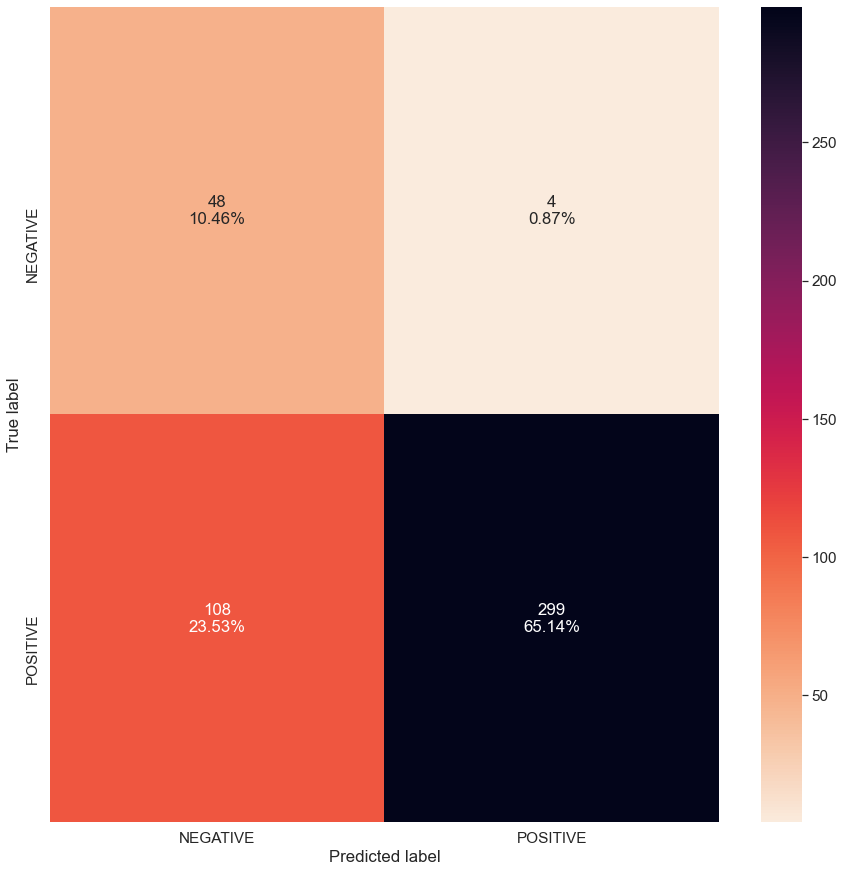

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
cmap = sns.cm.rocket_r

plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
categories = ['NEGATIVE', 'POSITIVE'] 
make_confusion_matrix(confusion_matrix(y_test, predictions),
                      categories=categories,
                      cmap=cmap, sum_stats=False, figsize=(15,15), percent=True)

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

auc = roc_auc_score(test_data['label'], test_data['predicted_label'])
print (auc)

# predictions = np.argmax(predictions, axis=1)

# lr_probs = predictions[:,1]
# ns_probs = [0 for _ in range(len(y_test))]

# # calculate scores
# ns_auc = roc_auc_score(testy, ns_probs)
# lr_auc = roc_auc_score(testy, lr_probs)
# # summarize scores
# print('No Skill: ROC AUC=%.3f' % (ns_auc))
# print('Logistic: ROC AUC=%.3f' % (lr_auc))
# # calculate roc curves
# ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
# lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# # plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
# pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# # axis labels
# pyplot.xlabel('False Positive Rate')
# pyplot.ylabel('True Positive Rate')
# # show the legend
# pyplot.legend()
# # show the plot
# pyplot.show()

0.8288603288603289


In [26]:
sequence = tokenizer.texts_to_sequences(['Seminyak is so dirty and bad beach'])
test = pad_sequences(sequence, maxlen=max_len)
categories[np.around(models.predict(test), decimals=0).argmax(axis=1)[0]]

'NEGATIVE'

In [27]:
sequence2 = tokenizer.texts_to_sequences(['Doing justice to it is name, the beach is just a dreamland with awesome waves and beautiful scenery around.'])
test2 = pad_sequences(sequence2, maxlen=max_len)
categories[np.around(models.predict(test2), decimals=0).argmax(axis=1)[0]]

'POSITIVE'

In [28]:
sequence3 = tokenizer.texts_to_sequences(['there are a lot of trash in this beach. Like literally it is covered with trash. So Dirty'])
test3 = pad_sequences(sequence3, maxlen=max_len)
categories[np.around(models.predict(test3), decimals=0).argmax(axis=1)[0]]

'NEGATIVE'

In [29]:
sequence4 = tokenizer.texts_to_sequences(['Nice beach and wide shore, good for walking along the waves, taking massage to relax and feel comfort while blowing sea breeze. High tide waves are never dangerous for swimming. Such a safe and lovely sea.'])
test4 = pad_sequences(sequence4, maxlen=max_len)
categories[np.around(models.predict(test4), decimals=0).argmax(axis=1)[0]]

'POSITIVE'

In [30]:
# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

confusion_matrix = pd.crosstab(test_data['label'], test_data['predicted_label'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    0    1
Actual             
0           48    4
1          108  299
